# Linear Regression with Python

In this regression we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression as it involves just two variables.

## Importing Libraries and Dataset

In [1]:
# Importing libraries

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Importing data from csv file from own computer

url = "http://bit.ly/w-data"
student_data_frame = pd.read_csv(url)
#student_data_frame = pd.read_csv("student.csv")

In [3]:
# Storing student data into new variable

store_student_data = student_data_frame.head(7)

In [4]:
# Displaying student data 

store_student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88


## Plotting of data

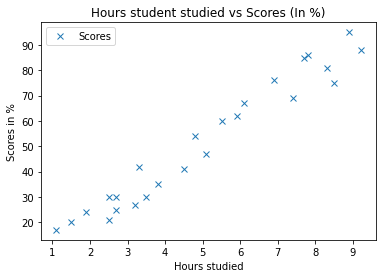

In [5]:
# Plotting student data on basis of hours they study and scores they get

student_data_frame.plot (x='Hours', y='Scores', style='x')
plt.title ('Hours student studied vs Scores (In %)')
plt.xlabel ('Hours studied')
plt.ylabel ('Scores in %')
plt.show()

From the graph we can see that there is positive linear regression between scores student got and hours of time they studied

## Preparing the data

In [6]:
student_data_frame.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# Dividing the data into input (attributes) and output (labels)

# Input
X = student_data_frame.iloc[:, :-1].values 

# Output
y = student_data_frame.iloc[:, 1].values 

Splitting data into training sets and test sets

In [8]:
# Importing sklearn

from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=101) 

## Training the Algorithm

In [9]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

print('Training complete..')

Training complete..


In [10]:
# Regression coefficient

linear_regressor.coef_

array([9.73330705])

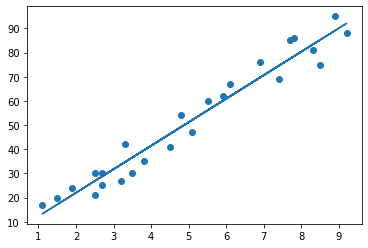

In [11]:
# Plotting the regression line
line = linear_regressor.coef_*X + linear_regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

## Making Predictions

In [12]:
# Testing data - In Hours

print(X_test)

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [13]:
# Predicting the scores based on scores

y_predictions = linear_regressor.predict(X_test)

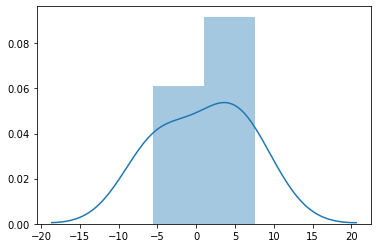

In [14]:
import seaborn as sns

# Distribution plot
sns.distplot((y_test - y_predictions))

In [15]:
# Comparing Actual vs Predicted

data_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_predictions})  
data_frame

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


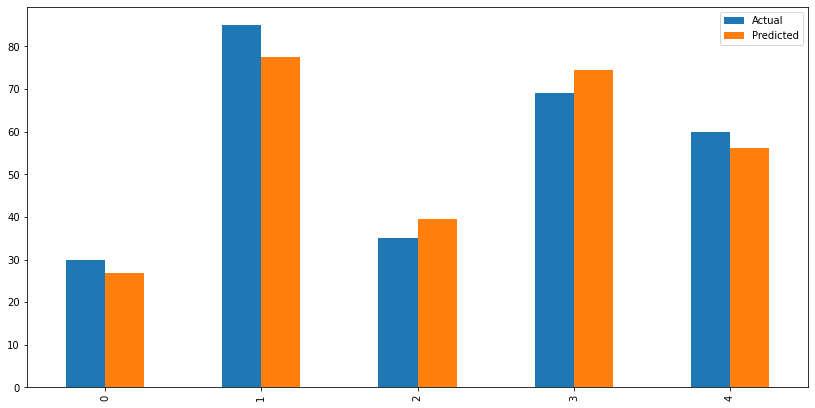

In [16]:
# Plot showing actual and predicted value

data_frame.plot(kind='bar', figsize=(14,7))
plt.show()

In [17]:
# Prediction with our own data with hours = 9.25

hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = linear_regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029958


## Evaluation of Model

This step is important to compare how well different algorithms perform on a particular dataset.

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predictions)) 
print('Mean Squared Error', metrics.mean_squared_error(y_test, y_predictions))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test, y_predictions)))

Mean Absolute Error: 4.937597792467706
Mean Squared Error 26.675642597052256
Root Mean Squared Error 5.164846812544614
